In [467]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
import scipy.stats as stats
import seaborn as sb

In [413]:
df1 = pd.read_csv('data/train.csv')

In [370]:
df2 = pd.read_csv('data/test.csv')

In [371]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [372]:
df2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [414]:
X_train = df1.drop(['Name','Cabin','Ticket'], axis = 1)
X_test = df1.drop(['Name','Cabin','Ticket'], axis = 1)

In [415]:
y_train = df1['Survived']

In [416]:
X_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [417]:
stat, p_val = stats.shapiro(df1['Age'].values)
print(stat, p_val)

nan 1.0


In [418]:
X_train.isnull()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False
887,False,False,False,False,False,False,False,False,False
888,False,False,False,False,True,False,False,False,False
889,False,False,False,False,False,False,False,False,False


In [419]:
X_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

/home/labuser/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


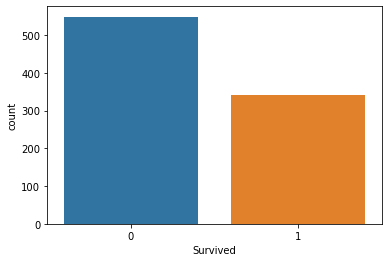

In [420]:
#bar plot for survived and not survived
sb.countplot('Survived',data=df1)
plt.show()

In [421]:
continious_features = ['Age', 'Fare']
descrete_features = ['Pclass','Sex', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked']

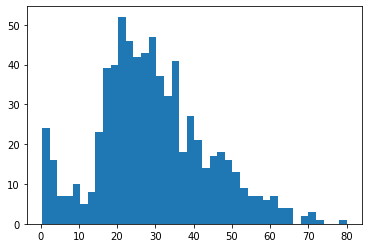

In [422]:
plt.hist(X_train['Age'], bins = 40)
plt.show()

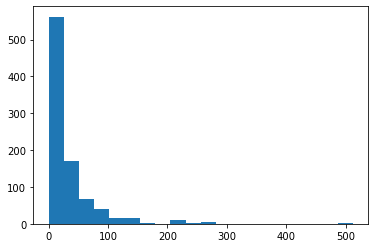

In [423]:
plt.hist(X_train['Fare'], bins = 20)
plt.show()

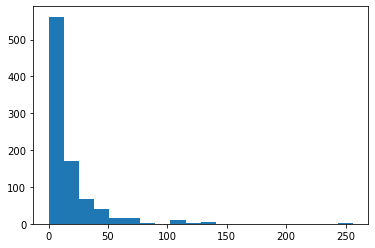

In [424]:
#Upper limit for infinity and apply log transformation
plt.hist(X_train['Fare']**1/2, bins = 20)
plt.show()

In [425]:
X_train['Fare_log'] = np.log2(X_train['Fare'])
X_train.head()

/home/labuser/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Fare_log
0,1,0,3,male,22.0,1,0,7.2500,S,2.857981
1,2,1,1,female,38.0,1,0,71.2833,C,6.155492
2,3,1,3,female,26.0,0,0,7.9250,S,2.986411
3,4,1,1,female,35.0,1,0,53.1000,S,5.730640
4,5,0,3,male,35.0,0,0,8.0500,S,3.008989


In [426]:
#If Fare is tranformed using log function the min value retuened is -inf
X_train['Fare_log'].describe()

count    891.000000
mean           -inf
std             NaN
min            -inf
25%        2.983748
50%        3.853417
75%        4.954196
max        9.000927
Name: Fare_log, dtype: float64

<AxesSubplot:xlabel='Sex', ylabel='Age'>

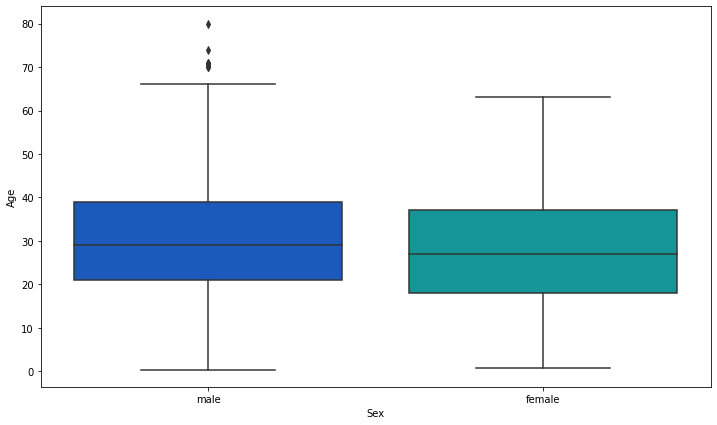

In [427]:
plt.figure(figsize=(12, 7))
sb.boxplot(x='Sex',y='Age',data=X_train,palette='winter') #Old aged Males(outliers) signifinance must be tested;

In [428]:
survived = df1[df1['Survived'] == 1]
died = df1[df1['Survived'] == 0]

In [429]:
mean1 = survived['Age'].mean()
mean2 = died['Age'].mean()

In [398]:
df1['PassengerId'].nunique()

891

In [430]:
#Replace Age
survived_new = X_train[(X_train['Age'].isna()) &(X_train['Survived']== 1)].fillna(mean1)

In [431]:
died_new = X_train[(X_train['Age'].isna()) &(X_train['Survived']== 0)].fillna(mean2)

In [432]:
notna_new = X_train[X_train['Age'].notna()]

In [433]:
X_train = pd.concat([survived_new,died_new,notna_new])
X_train = X_train.sort_values(by=['PassengerId'])
X_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Fare_log
0,1,0,3,male,22.0,1,0,7.2500,S,2.857981
1,2,1,1,female,38.0,1,0,71.2833,C,6.155492
2,3,1,3,female,26.0,0,0,7.9250,S,2.986411
3,4,1,1,female,35.0,1,0,53.1000,S,5.730640
4,5,0,3,male,35.0,0,0,8.0500,S,3.008989


In [434]:
df1['Cabin'].describe() #Most data is missing, hence drop cabin & tickets

count         204
unique        147
top       B96 B98
freq            4
Name: Cabin, dtype: object

In [436]:
X_train = X_train.drop(['PassengerId', 'Survived','Fare_log'],axis = 1)
#X_test = X_test.drop(['PassengerId', 'Survived','Cabin','Ticket','Name'], axis = 1)

In [438]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  889 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 55.7+ KB


In [439]:
sex1 = pd.get_dummies(df1['Sex'])
embark1 = pd.get_dummies(df1['Embarked'])
sex1

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [440]:
embark1

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [441]:
X_train = pd.concat([X_train,embark1,sex1],axis=1)
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,C,Q,S,female,male
0,3,male,22.0,1,0,7.2500,S,0,0,1,0,1
1,1,female,38.0,1,0,71.2833,C,1,0,0,1,0
2,3,female,26.0,0,0,7.9250,S,0,0,1,1,0
3,1,female,35.0,1,0,53.1000,S,0,0,1,1,0
4,3,male,35.0,0,0,8.0500,S,0,0,1,0,1


In [442]:
X_train = X_train.drop(['Sex','Embarked'], axis = 1)

In [443]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Age     891 non-null    float64
 2   SibSp   891 non-null    int64  
 3   Parch   891 non-null    int64  
 4   Fare    891 non-null    float64
 5   C       891 non-null    uint8  
 6   Q       891 non-null    uint8  
 7   S       891 non-null    uint8  
 8   female  891 non-null    uint8  
 9   male    891 non-null    uint8  
dtypes: float64(2), int64(3), uint8(5)
memory usage: 46.1 KB


In [444]:
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,C,Q,S,female,male
0,3,22.0,1,0,7.2500,0,0,1,0,1
1,1,38.0,1,0,71.2833,1,0,0,1,0
2,3,26.0,0,0,7.9250,0,0,1,1,0
3,1,35.0,1,0,53.1000,0,0,1,1,0
4,3,35.0,0,0,8.0500,0,0,1,0,1


In [445]:
# y_train = df1['Survived']
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [446]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

/home/labuser/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = clf.predict(X_test)

In [463]:
X_train = X_train.drop('female',axis = 1)

In [464]:
X_train = X_train.drop('C',axis = 1)

In [468]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

/home/labuser/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [466]:
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,Q,S,male
0,3,22.0,1,0,7.2500,0,1,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,1,0
3,1,35.0,1,0,53.1000,0,1,0
4,3,35.0,0,0,8.0500,0,1,1
